# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# Load and understand dataset features


In [2]:
df = pd.read_csv("bookings.csv",encoding='latin1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221069 entries, 0 to 221068
Data columns (total 21 columns):
room_id                 221069 non-null int64
host_id                 221067 non-null float64
room_type               221055 non-null object
borough                 0 non-null float64
neighborhood            221069 non-null object
reviews                 221069 non-null int64
overall_satisfaction    198025 non-null float64
accommodates            219750 non-null float64
bedrooms                220938 non-null float64
price                   221057 non-null float64
minstay                 63969 non-null float64
latitude                221069 non-null float64
longitude               221069 non-null float64
last_modified           221069 non-null object
date                    221069 non-null object
survey_id               70756 non-null float64
country                 0 non-null float64
city                    70756 non-null object
bathrooms               0 non-null float64
name

D:\Softwares\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (17,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,...,latitude,longitude,last_modified,date,survey_id,country,city,bathrooms,name,location
0,2818,3159.0,Private room,NaN,Oostelijk Havengebied / Indische Buurt,77,5.0,2.0,1.0,90.0,...,52.365755,4.941419,44:31.8,2014-05-24,NaN,NaN,NaN,NaN,NaN,NaN
1,6243,3813.0,Private room,NaN,Oostelijk Havengebied / Indische Buurt,116,4.5,4.0,1.0,75.0,...,52.379212,4.926324,16:02.5,2014-05-24,NaN,NaN,NaN,NaN,NaN,NaN
2,15061,59297.0,Private room,NaN,Westerpark,53,5.0,4.0,1.0,66.0,...,52.382685,4.876130,01:54.1,2014-05-24,NaN,NaN,NaN,NaN,NaN,NaN
3,15865,59484.0,Private room,NaN,Centrum Oost,1,5.0,4.0,1.0,151.0,...,52.363786,4.893392,52:07.5,2014-05-24,NaN,NaN,NaN,NaN,NaN,NaN
4,20168,59484.0,Private room,NaN,Centrum Oost,4,4.0,2.0,1.0,90.0,...,52.365087,4.893541,36:24.6,2014-05-24,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.drop(['borough','minstay','last_modified','survey_id','name','location','city','country','bathrooms'], axis=1,inplace=True)

In [5]:
df.shape

(221069, 12)

In [6]:
df.columns.values

array(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price',
       'latitude', 'longitude', 'date'], dtype=object)

# Exploratory Data Analysis


In [10]:
# Lets first merge the room_id and host_id and create a new feature 'hotel_id'. And then drop
# those 2 features. Although its better to concatinate these two features. Here I am going to add them up.
df['hotel_id'] = df['room_id'] + df['host_id']

In [11]:
df.hotel_id.duplicated().sum() # There are 182762 duplicates. But are they really duplicates? No,
# bcz a host can book same hotel multiple times

182762

Text(0.5,1,'Accommodates')

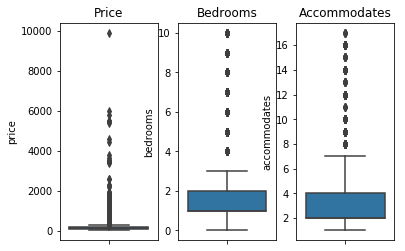

In [12]:
fig, axs = plt.subplots(1,3)
sns.boxplot(x=df.price, ax=axs[0], orient="v")
sns.boxplot(x=df.bedrooms, ax=axs[1], orient="v")
sns.boxplot(x=df.accommodates, ax=axs[2], orient="v")
axs[0].set_title('Price')
axs[1].set_title('Bedrooms')
axs[2].set_title('Accommodates')

In [13]:
df.price.describe()

count    221057.000000
mean        155.830247
std         103.786595
min          10.000000
25%         102.000000
50%         133.000000
75%         180.000000
max        9916.000000
Name: price, dtype: float64

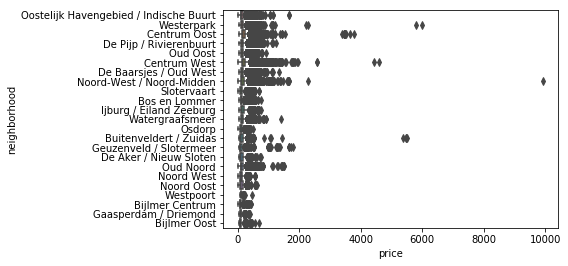

In [14]:
sns.boxplot(x=df.price,y=df.neighborhood)

In [15]:
q3 = df.price.quantile(.75)
q1 = df.price.quantile(.25)
iqr = q3 - q1
lower_bound = q1 - (iqr * 1.5)
upper_bound = q3 + (iqr * 1.5)
#DF without outliers in price
df = df[~((df.price > upper_bound) | (df.price < lower_bound))]

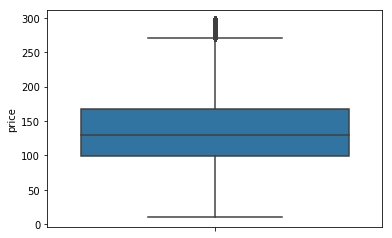

In [16]:
sns.boxplot(x=df.price, orient="v")
#As you can see below there are no more outliers in Price

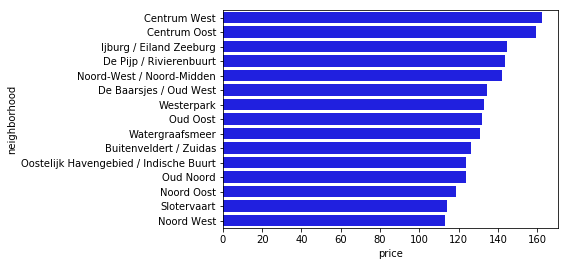

In [17]:
df1 =  df.groupby(['neighborhood'],as_index=False).agg({'price':'mean'}).sort_values(by='price',ascending=False)
df1 = df1[:15]
sns.barplot(x="price", y="neighborhood", data=df1,
            label="neighborhood", color="b")

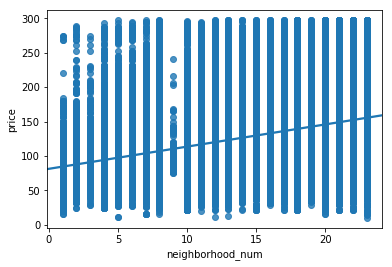

In [19]:
neighborhood_map={'Centrum West':23,'Centrum Oost':22,'De Pijp / Rivierenbuurt':21,'Noord-West / Noord-Midden':20,
                  'Ijburg / Eiland Zeeburg':19,'De Baarsjes / Oud West':18,'Westerpark':17,'Oud Oost':16,
                  'Watergraafsmeer':15,'Buitenveldert / Zuidas':14,'Oostelijk Havengebied / Indische Buurt':13,
                  'Oud Noord':12,'Noord Oost':11,'Bos en Lommer':10,'Westpoort':9,'Slotervaart':8,'Noord West':7,
                  'De Aker / Nieuw Sloten':6,'Osdorp':5,'Geuzenveld / Slotermeer':4,
                 'Gaasperdam / Driemond':3,'Bijlmer Oost':2,'Bijlmer Centrum':1}

df['neighborhood_num'] = df.neighborhood.map(neighborhood_map)

sns.regplot(x=df["neighborhood_num"], y=df["price"])

In [20]:
#Conver date object to datetime
df['date'] =  pd.to_datetime(df['date'], format='%Y-%m-%d')
#Extracting dayofweek from data time
df['day_of_week'] = df['date'].dt.weekday_name
#Map day_of_week to numbers with Monday=0, Sunday=6
day_mapping = {'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6}
df['day_of_week'] = df['day_of_week'].map(day_mapping)

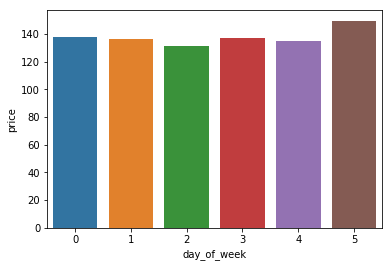

In [21]:
df1 = df.groupby(['day_of_week'],as_index=False).agg({'price':'mean'}).sort_values(by='price',ascending=False)
sns.barplot(x="day_of_week", y="price", data=df1,
            label="day_of_week")

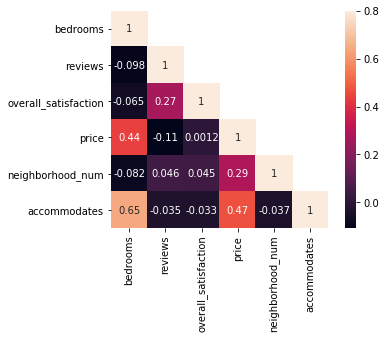

In [22]:
corrMatt = df[["bedrooms","reviews","overall_satisfaction","price","neighborhood_num","accommodates"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

In [23]:
df1 = df.groupby('hotel_id',as_index=False).agg({'reviews':'sum','overall_satisfaction':'mean','price':'mean'})
df.hotel_id.duplicated().sum() # has 165861 duplicates
#Lets drop duplicates
df_uniq_hotels = df.drop_duplicates(subset=['hotel_id'])
df1.head()

,hotel_id,reviews,overall_satisfaction,price
0,5977.0,2552,5.000000,79.625000
1,7015.0,227,4.583333,110.750000
2,10056.0,242,4.500000,73.500000
3,25712.0,49,4.666667,80.666667
4,29730.0,42,5.000000,144.111111


In [24]:
df_uniq_hotels.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude,date,hotel_id,neighborhood_num,day_of_week
0,2818,3159.0,Private room,Oostelijk Havengebied / Indische Buurt,77,5.0,2.0,1.0,90.0,52.365755,4.941419,2014-05-24,5977.0,13,5
1,6243,3813.0,Private room,Oostelijk Havengebied / Indische Buurt,116,4.5,4.0,1.0,75.0,52.379212,4.926324,2014-05-24,10056.0,13,5
2,15061,59297.0,Private room,Westerpark,53,5.0,4.0,1.0,66.0,52.382685,4.876130,2014-05-24,74358.0,17,5
3,15865,59484.0,Private room,Centrum Oost,1,5.0,4.0,1.0,151.0,52.363786,4.893392,2014-05-24,75349.0,22,5
4,20168,59484.0,Private room,Centrum Oost,4,4.0,2.0,1.0,90.0,52.365087,4.893541,2014-05-24,79652.0,22,5


In [25]:
# Delete unwanted columns as we no longer need 'latitude','longitude' as we have neighbourhood. Also as we
# extracted "day_of_week" lets delete "date". 
df_uniq_hotels = df_uniq_hotels.drop(['room_id','host_id','latitude','longitude','date'],axis=1)

#Replace the original values of price,overallsatisfaction with mean values and place it in new merged dataframe.
df_subset = pd.merge(df_uniq_hotels,df1, how='right',on='hotel_id')
df_subset.shape

(36536, 13)

In [26]:
df_subset.columns.values

array(['room_type', 'neighborhood', 'reviews_x', 'overall_satisfaction_x',
       'accommodates', 'bedrooms', 'price_x', 'hotel_id',
       'neighborhood_num', 'day_of_week', 'reviews_y',
       'overall_satisfaction_y', 'price_y'], dtype=object)

In [27]:
# Lets drop original values like price_x etc and keep aggreated ones and themn rename few column names. 
df_subset = df_subset.drop(['price_x','overall_satisfaction_x','reviews_x'],axis=1)
df_subset = df_subset.rename(columns={'reviews_y' : 'reviews','overall_satisfaction_y' : 'satisfaction',
                                      'price_y' : 'price'},copy=False)


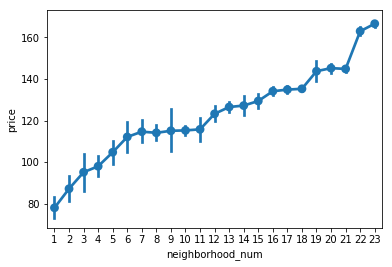

In [28]:
sns.pointplot(x=df_subset["neighborhood_num"], y=df_subset["price"])

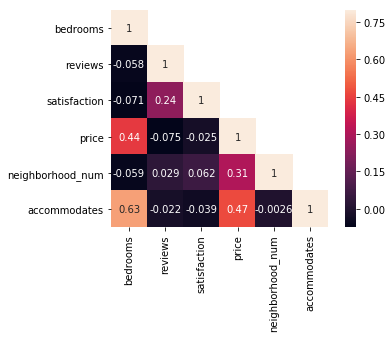

In [29]:
corrMatt = df_subset[["bedrooms","reviews","satisfaction","price","neighborhood_num","accommodates"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

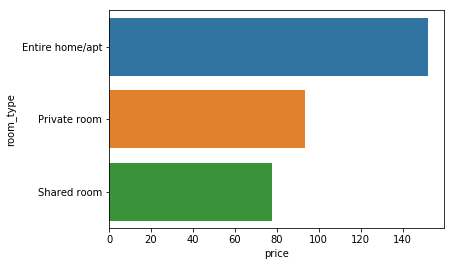

In [30]:
df1 = df_subset.groupby('room_type',as_index=False).agg({'price':'mean'}).sort_values(by='price',ascending=False)
sns.barplot(x="price", y="room_type", data=df1,
            label="room_type")

In [31]:
roomtype_to_numeric = {'Entire home/apt':3,'Private room':2,'Shared room':1,}

df_subset['roomtype_num'] = df_subset.room_type.map(roomtype_to_numeric)

df_subset[["price",'roomtype_num']].corr()

,price,roomtype_num
price,1.000000,0.430536
roomtype_num,0.430536,1.000000


In [32]:
# Lets drop the "room_type"
df_subset = df_subset.drop(['room_type'],axis=1)
df_subset.shape

(36536, 10)

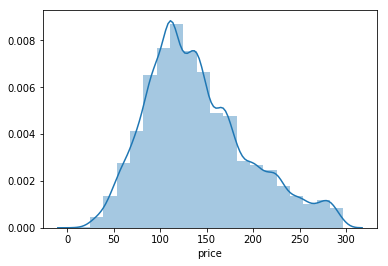

In [33]:
# Filtering out null samples with null price
df_subset = df_subset[~df_subset.price.isnull()]
# Type casting price from float to int
df_subset.price.astype(int)

sns.distplot(df_subset['price'], bins=20)